In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import wave
import IPython.display as ipd
from PIL import Image
from matplotlib import image

In [10]:
def DCT(data):
    N = len(data)
    # amplitude do k-ésimo cosseno
    Ak = math.sqrt(2/N)
    # c para o k = 0
    C0 = math.sqrt(0.5)
    # c para todos os outros k
    Ck = 1
    # resultado final do somatório
    somatorio = 0
    teste = np.copy(data)

    X = np.zeros(N)

    for k in range(N):

        somatorio = 0

        for n in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)
            somatorio += teste[n]*math.cos(valor1 + valor2)

        if k == 0:
            X[k] = round(Ak*C0*somatorio, 5)
        else:
            X[k] = round(Ak*Ck*somatorio, 5)
    
    return X

In [11]:
def IDCT(data):
    N = len(data)
    # amplitude do k-ésimo cosseno
    Ak = math.sqrt(2/N)
    # c para o k = 0
    C0 = math.sqrt(0.5)
    # c para todos os outros k
    Ck = 1
    # resultado final do somatório
    somatorio = 0
    teste = np.copy(data)

    x = np.zeros(N, dtype = float)

    for n in range(N):

        somatorio = 0

        for k in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)

            if k == 0:
                somatorio += C0*teste[k]*math.cos(valor1 + valor2)
            else:
                somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

        x[n] = round(Ak*somatorio, 4)
    
    return x

In [6]:
def maiores(data, numPreservados):
    N = len(data)
    maior = 0
    indiceI = 0
    indiceJ = 0
    # array que vai receber maiores numeros
    maiores = np.zeros(data.shape)
    # array que vai ser um auxiliar para pegar os maiores
    copiaX = np.copy(data)

    maiores[0][0] = data[0][0]
    copiaX[0][0] = 0
    
    for x in range(numPreservados):
        maior = 0
        for i in range(N):
            for j in range(N):
                if(math.fabs(copiaX[i][j]) > math.fabs(maior)):
                    maior = copiaX[i][j]
                    indiceI = i
                    indiceJ = j
        maiores[indiceI][indiceJ] = maior
        copiaX[indiceI][indiceJ] = 0
        
    return maiores

nível DC:  25261.12891


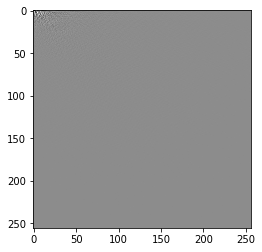

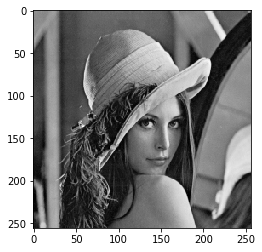

In [15]:
original_image = Image.open('lena.bmp')

#defino a largura e altura
width, height = original_image.size
originalArray = np.asarray(original_image)

imagemDCT = np.zeros(originalArray.shape)
imgIDCT = np.zeros(originalArray.shape)


# DCT NORMAL
for i, linha in enumerate(originalArray):
    imagemDCT[i] = DCT(linha)
    
transposta = imagemDCT.T

for i, linha in enumerate(transposta):
    transposta[i] = DCT(linha)

aux = transposta.T
print("nível DC: ", aux[0][0])
aux[0][0] = 0

#imprime DCT
plt.imshow(aux, cmap="gray")
plt.show()

# INVERSÃO
for i, linha in enumerate(transposta.T):
    imgIDCT[i] = IDCT(linha)
    
transpostaIDCT = imgIDCT.T

for i, linha in enumerate(transpostaIDCT):
    transpostaIDCT[i] = IDCT(linha)
    
#printa a lena    
plt.imshow(transpostaIDCT.T, cmap="gray")
plt.show() 

nível DC:  25261.12891


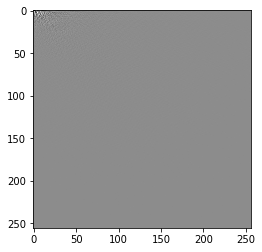

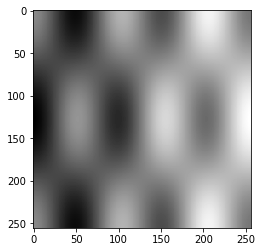

In [13]:
original_image = Image.open('lena.bmp')

#defino a largura e altura
width, height = original_image.size
originalArray = np.asarray(original_image)

imagemDCT = np.zeros(originalArray.shape)
imgIDCT = np.zeros(originalArray.shape)

# DCT NORMAL
for i, linha in enumerate(originalArray):
    imagemDCT[i] = DCT(linha)
transposta = imagemDCT.T

for i, linha in enumerate(transposta):
    transposta[i] = DCT(linha)

a = transposta.T
print("nível DC: ", a[0][0])
a[0][0] = 0

#aplicação do filtro, num cossenos
filtrados = maiores(transposta.T, 2)

plt.imshow(a, cmap="gray")
plt.show()

# INVERSÃO
for i, linha in enumerate(filtrados):
    imgIDCT[i] = IDCT(linha)
    
transpostaIDCT = imgIDCT.T

for i, linha in enumerate(transpostaIDCT):
    transpostaIDCT[i] = IDCT(linha)
    
# printa a lena    
plt.imshow(transpostaIDCT.T, cmap="gray")
plt.show() 